In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import pandas as pd
import numpy as np
import mne

# Load Annotations

In [5]:
import sys
sys.path.append('../read_labels/v1.0.0/src')
import sys_tools.nedc_cmdl_parser as ncp
import sys_tools.nedc_file_tools as nft
import sys_tools.nedc_ann_tools as nat

## .tse_bi

In [10]:
filepath = '../dataset/edf/train/01_tcp_ar/077/00007793/s001_2011_05_27/00007793_s001_t001.tse_bi'
ann = nat.Annotations()
status = ann.load(nft.get_fullpath(filepath))
annotations = ann.get(level_a=0, sublevel_a=0)

In [11]:
annotations

[[0.0, 19.84, OrderedDict([('bckg', 1.0)])],
 [19.84, 97.252, OrderedDict([('seiz', 1.0)])],
 [97.252, 413.044, OrderedDict([('bckg', 1.0)])],
 [413.044, 475.336, OrderedDict([('seiz', 1.0)])],
 [475.336, 511.904, OrderedDict([('bckg', 1.0)])],
 [511.904, 631.852, OrderedDict([('seiz', 1.0)])],
 [631.852, 700.952, OrderedDict([('bckg', 1.0)])],
 [700.952, 760.136, OrderedDict([('seiz', 1.0)])],
 [760.136, 851.992, OrderedDict([('bckg', 1.0)])],
 [851.992, 909.012, OrderedDict([('seiz', 1.0)])],
 [909.012, 1371.0, OrderedDict([('bckg', 1.0)])]]

## .lbl_bi

In [88]:
filepath = '../dataset/edf/train/01_tcp_ar/077/00007793/s001_2011_05_27/00007793_s001_t001.lbl_bi' # See channel 4
ann = nat.Annotations()
status = ann.load(nft.get_fullpath(filepath))
annotations = ann.get(0,0,3)

In [89]:
annotations

[[0.0, 1371.0, OrderedDict([('bckg', 1.0)])]]

## .tse

In [32]:
filepath = '../dataset/edf/train/01_tcp_ar/077/00007793/s001_2011_05_27/00007793_s001_t001.tse'
ann = nat.Annotations()
status = ann.load(nft.get_fullpath(filepath))
annotations = ann.get(level_a=0, sublevel_a=0)

In [33]:
annotations

[[0.0, 19.84, OrderedDict([('bckg', 1.0)])],
 [19.84, 97.252, OrderedDict([('fnsz', 1.0)])],
 [97.252, 413.044, OrderedDict([('bckg', 1.0)])],
 [413.044, 475.336, OrderedDict([('fnsz', 1.0)])],
 [475.336, 511.904, OrderedDict([('bckg', 1.0)])],
 [511.904, 631.852, OrderedDict([('fnsz', 1.0)])],
 [631.852, 700.952, OrderedDict([('bckg', 1.0)])],
 [700.952, 760.136, OrderedDict([('fnsz', 1.0)])],
 [760.136, 851.992, OrderedDict([('bckg', 1.0)])],
 [851.992, 909.012, OrderedDict([('fnsz', 1.0)])],
 [909.012, 1371.0, OrderedDict([('bckg', 1.0)])]]

## .lbl

In [66]:
filepath = '../dataset/edf/train/01_tcp_ar/077/00007793/s001_2011_05_27/00007793_s001_t001.lbl' # See channel 4
ann = nat.Annotations()
status = ann.load(nft.get_fullpath(filepath))
annotations = ann.get(0,0,4)

In [67]:
annotations

[[0.0, 19.84, OrderedDict([('bckg', 1.0)])],
 [19.84, 97.252, OrderedDict([('fnsz', 1.0)])],
 [97.252, 851.992, OrderedDict([('bckg', 1.0)])],
 [851.992, 909.012, OrderedDict([('fnsz', 1.0)])],
 [909.012, 1371.0, OrderedDict([('bckg', 1.0)])]]

In [69]:
annotations[0]

[0.0, 19.84, OrderedDict([('bckg', 1.0)])]

In [60]:
len(annotations[0][2])

0

In [65]:
'bckg' in annotations[0][2].keys()

False

# Import annotations in MNE objects

## Create annotations

In [73]:
# Load annotations
filepath = '../dataset/edf/train/01_tcp_ar/077/00007793/s001_2011_05_27/00007793_s001_t001.tse_bi'
ann = nat.Annotations()
status = ann.load(nft.get_fullpath(filepath))
annotations = ann.get(level_a=0, sublevel_a=0)

# Create mne.Annotations object
onset = []
duration = []
description = []
for annotation in annotations:
    if 'seiz' in annotation[2].keys():
        onset.append(annotation[0])
        duration.append(annotation[1] - annotation[0])
        description.append('seiz')
my_annot = mne.Annotations(onset=onset,
                           duration=duration,
                           description=description)

<Annotations | 5 segments: seiz (5)>


## Add annotations

In [6]:
filepath = '../dataset/edf/train/01_tcp_ar/077/00007793/s001_2011_05_27/00007793_s001_t001.edf'
raw = mne.io.read_raw_edf(filepath)
raw.load_data()

Extracting EDF parameters from /media/windows/Users/Remy/OneDrive/Documents/Polycoco/dataset/edf/train/01_tcp_ar/077/00007793/s001_2011_05_27/00007793_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 342749  =      0.000 ...  1370.996 secs...


<RawEDF | 00007793_s001_t001.edf, 36 x 342750 (1371.0 s), ~94.2 MB, data loaded>

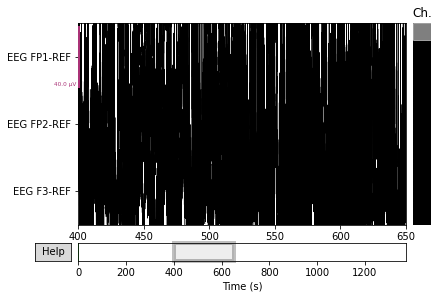

In [7]:
raw.plot(start=400, duration=250, n_channels=3);

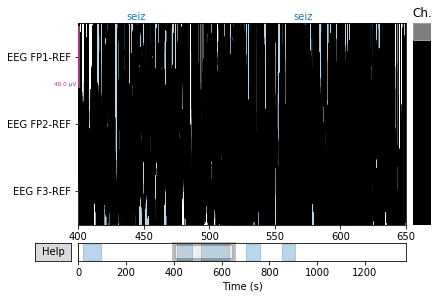

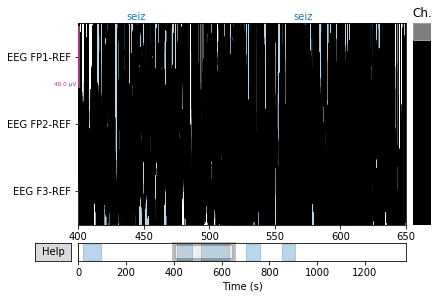

In [87]:
raw.set_annotations(my_annot)
raw.plot(start=400, duration=250, n_channels=3)

_____